# Importing Libraries

In [1]:
!pip install --upgrade tensorflow --quiet
!pip install matplotlib --quiet

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Importing Images

In [3]:
SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Corals",
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

len(dataset)

Found 11222 files belonging to 2 classes.


351

In [4]:
class_names = dataset.class_names
class_names

['bleached_corals', 'healthy_corals']

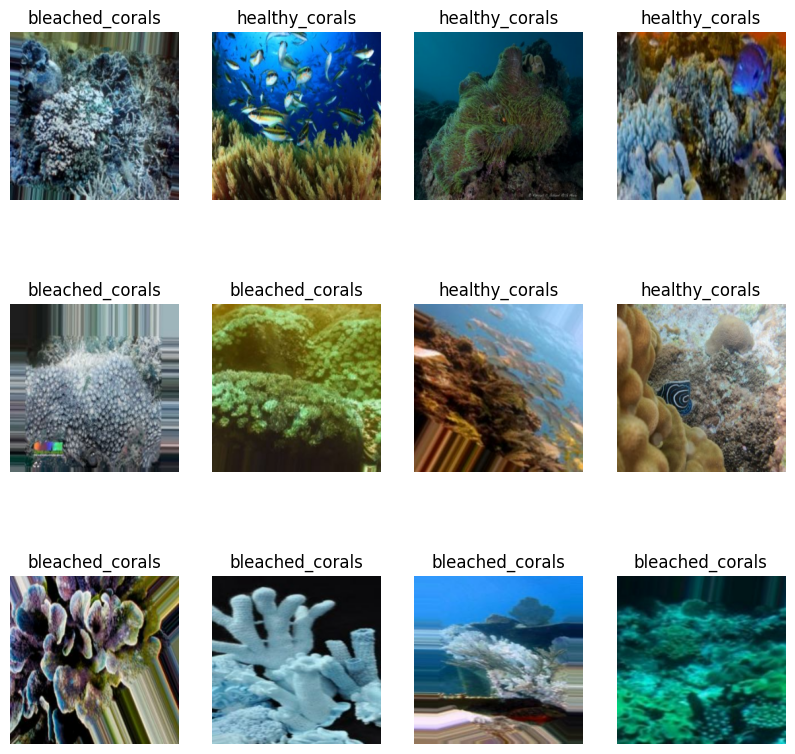

In [5]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

# Splitting data into Training, Validation and Test Sets:

80% ==> training 20% ==> 10% validation, 10% test

In [6]:
dataset = dataset.shuffle(10000,seed=13)

# Training Dataset
train_size = 0.8
s = int(len(dataset) * train_size)
train = dataset.take(s)
print(len(train))

test = dataset.skip(s)

# Validation Dataset
val_size = 0.1
s1 = int(len(dataset) * val_size)
valid = test.take(s1)
print(len(valid))

# Test Dataset
test = test.skip(s1)
print(len(test))

280
35
36


In [7]:
# Optimize the performance of model
train = train.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
valid = valid.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Pre-Processing and Data Augmentation

In [8]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(SIZE, SIZE),
    tf.keras.layers.Rescaling(1./255)
])

augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

# Model Building

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

SIZE = 256 
BATCH_SIZE = 32

# Build the model
model = tf.keras.models.Sequential([
    layers.Input(shape=(SIZE, SIZE, 3)),
    resize_and_rescale,
    augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(2, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train, epochs=100, batch_size=BATCH_SIZE, verbose=1, validation_data=valid)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 290s 843ms/step - accuracy: 0.6469 - loss: 0.6166 - val_accuracy: 0.7045 - val_loss: 0.5830
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 203s 725ms/step - accuracy: 0.7163 - loss: 0.5503 - val_accuracy: 0.7268 - val_loss: 0.5561
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 198s 708ms/step - accuracy: 0.7410 - loss: 0.5253 - val_accuracy: 0.6946 - val_loss: 0.5647
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 196s 699ms/step - accuracy: 0.7443 - loss: 0.5123 - val_accuracy: 0.7420 - val_loss: 0.5175
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 193s 690ms/step - accuracy: 0.7563 - loss: 0.5050 - val_accuracy: 0.7420 - val_loss: 0.5222
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 194s 692ms/step - accuracy: 0.7544 - loss: 0.5048 - val_accuracy: 0.7571 - val_loss: 0.5157
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 194s 693ms/step - accuracy: 0.7645 - loss: 0.4850 - val_accuracy: 0.7589 - val_loss: 0.5052
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 195s 694ms/step - accuracy: 

In [10]:
scores = model.evaluate(test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 313ms/step - accuracy: 0.9427 - loss: 0.1905


In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,856 (1.92 MB)

 Trainable params: 167,618 (654.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,238 (1.28 MB)

# Plotting Accuracy and Loss Curves

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

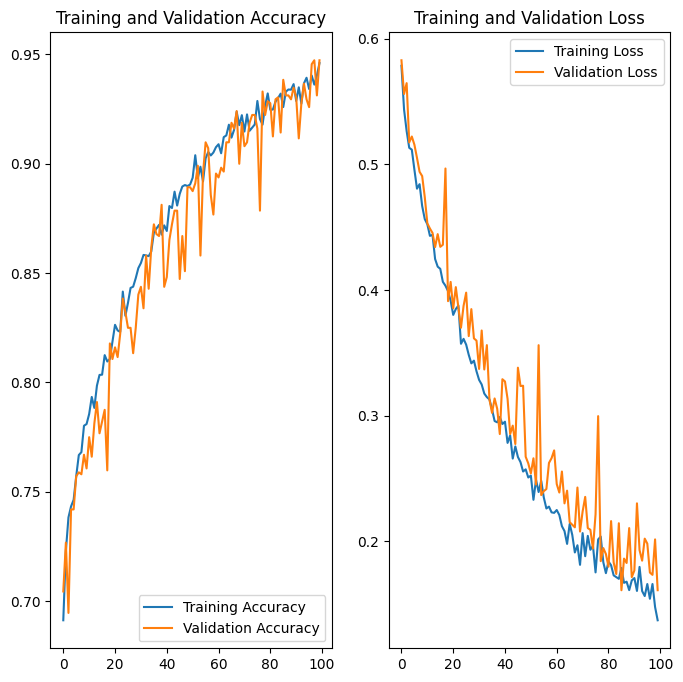

In [15]:
epochs = len(acc) 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


# Prediction

First Image to predict
First Image's actual Label: healthy_corals
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
healthy_corals


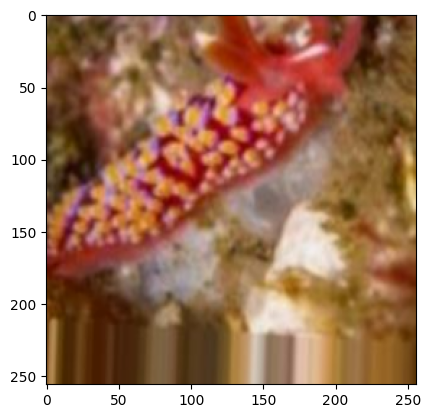

In [16]:
for image_batch , label_batch in dataset.take(1):
  # plt.imshow(image_batch[0].numpy().astype('uint8'))
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("First Image to predict")
    plt.imshow(first_image)
    print("First Image's actual Label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    fclass = class_names[np.argmax(batch_prediction[0])]
    print(fclass)

# Saving the Model

In [17]:
model.save('CNN.keras')